# Information

Im diesem Notebook werden Messdaten einer Potenzfunktion simuliert. Dazu wird die Funktion

`mw.rand_pot_messwerte()` 

benutzt, ihre Aufrufparameter sind

- n: Anzahl der Messpunkte

- x_0, x_1: Messintervall, $x_0 \le x \le x_1$


- c: Koeffizient der Messfunktion y=c*x**kappa
- kappa: Exponent der Messfunktion y=c*x**kappa


- epsilon: Messfehler

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

from fun_expr import Function_from_Expression as FE
import messwerte as mw

from scipy.optimize import curve_fit

Die Simulation. Die Daten, mit denen die Funktion `mw.rand_pot_messwerte()` aufgerufen werden, können verändert werden.

In [2]:
n = 11
c_0 = 5
kappa_0 = 0.67
x_0 = 1
x_1 = 100
epsilon=5e-2

**Die Originalfunktion**

In [3]:
x = Symbol('x')
f = FE(x, c_0*x**kappa_0,name='f')
f.equation()

<IPython.core.display.Math object>

**Die simulierten Messwerte**

In [4]:
lx, ly = mw.rand_pot_messwerte(
    n=n,
    x_0=x_0,
    x_1=x_1,
    c=c_0,
    kappa=kappa_0,
    epsilon=epsilon
)

df = pd.DataFrame(
    {
        'x': lx,
        'y': ly
    }
)

df

,x,y
0,1.000000,4.802901
1,1.584893,7.067296
2,2.511886,9.282270
3,3.981072,13.770009
4,6.309573,15.969106
5,10.000000,25.519436
6,15.848932,33.561109
7,25.118864,43.959575
8,39.810717,60.793874
9,63.095734,75.447815


Darstellung der Simulation in einem dopplt logarithmisch geteilten Diagramm:

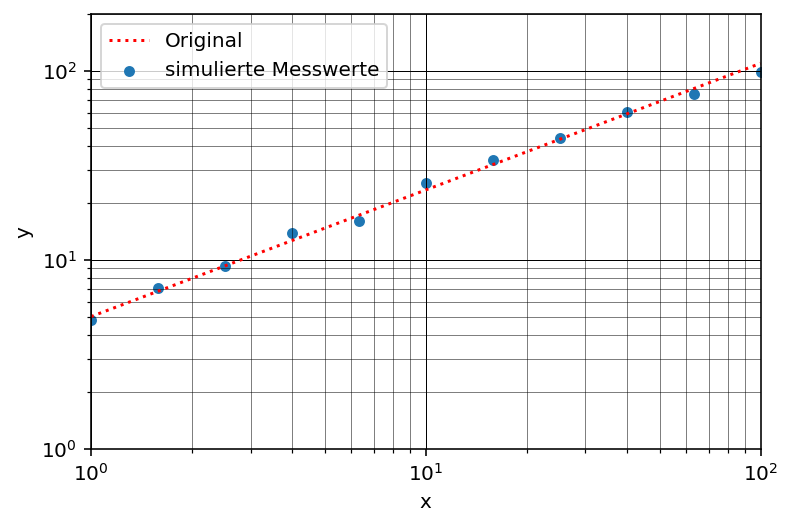

In [11]:
ax = df.plot(kind='scatter', loglog=True, x='x',y='y',label='simulierte Messwerte')

ax.plot(df.x,f.lambdified(df.x),c='r',ls='dotted',label='Original')

ax.set(xlim=(1,100),ylim=(1,200))
ax.grid(which='major',lw=0.5,c='k')
ax.grid(which='minor',lw=0.25,c='k')

ax.legend()

## Bestimmung der Regressionsgeraden im logarithmisch geteilten Diagramm:

Für die Durchführung der Regression wird eine lineare Funktion benötigt:

In [6]:
def f_lin(x, a,b):
    return a*x+b

Im doppelt logarithmisch geteilten Diagramm liegen die Messpunkte einer Potenzfunktion mit guter Näherung auf einer Geraden. Deshalb kann für Potenzfunktionen die Methode der kleinesten Quadrate benutzt werden, um eine Regressionsgerade zu ermitteln.

Diese Regressionsgerade wird aber für die logarithmische Darstellung der Funktion benutzt.

Der Funktion `curve_fit()` werden daher nicht die Daten `df.x` und `df.y` übergeben.
Vielmehr folgt aus

$$
  y = c\,x^\kappa
$$

durch logarithmieren beider Seiten der Gleichung

\begin{align}
  \log(y) &= \underbrace{\log(c)}_{b} + \underbrace{\kappa}_{a}\,\log(x)
\end{align}

Das heißt, in einem doppelt logarithmisch geteilten Diagramm ist die Potenzfunktion $y=c\,x^\varkappa$ eine Gerade. Die Parameter dieser Geraden können durch lineare Regression berechnet werden. Dazu werden der Funktion `curve_fit` statt `df.x` und `df.y` die logarithmierten Werte `np.log(df.x)` und `np.log(df.y)` übergeben. Für die Ergebnisse der Regression ist dann

\begin{align}
  a &= \kappa \quad\implies\quad \kappa = a\\
  \log(c) &= b \quad\implies\quad c = \mathrm{e}^b
\end{align}

**Bestimmung der Regressionsgeraden:**

In [7]:
p_opt, cov_opt = curve_fit(f_lin, np.log(df.x),np.log(df.y))
p_opt

array([0.65683265, 1.64230931])

**Umrechnung auf die Potenzfunktion:**

In [8]:
a,b = p_opt
kappa=a
c=np.exp(b)

(c,kappa)

**Darstellung des Ergebnisses**

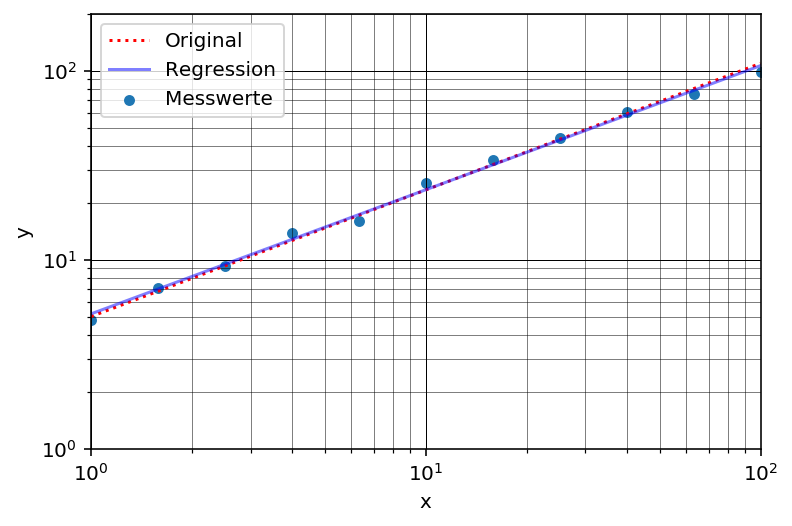

In [9]:
ax = df.plot(kind='scatter',loglog=True, x='x',y='y', label='Messwerte')

lx = np.linspace(1,100)
ax.plot(df.x,f.lambdified(df.x),c='r',ls='dotted',label='Original')
ax.plot(df.x,c*df.x**kappa,c='b',label='Regression',alpha=0.5)

ax.set(xlim=(1,1e2),ylim=(1,2e2))
ax.grid(which='major',lw=0.5,c='k')
ax.grid(which='minor',lw=0.25,c='k')

ax.legend()